In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
os.chdir("/Users/Hatim/Downloads/")

In [3]:
df = pd.read_csv("home_prices_train.csv",index_col = 0)

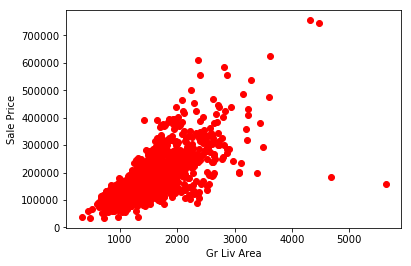

In [4]:
plt.plot(df['GrLivArea'],df['SalePrice'],'ro')
plt.xlabel("Gr Liv Area")
plt.ylabel("Sale Price")
plt.show()

In [5]:
#As it can be seen that there are few outliers. Removing those outliers to get better results.
df = df[df["GrLivArea"]<4000]

In [6]:
##checking for NaN values
print(df.isnull().sum(axis=0).to_string())

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1365
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [7]:
def missing_data_treatment(dataframe):
    "It is likely that no street is connected to the property and hence the LotFrontage is zero"
    dataframe.loc[:,"LotFrontage"] = dataframe.loc[:,"LotFrontage"].fillna(0)
    "There is no alley access when Alley = NaN"
    dataframe.loc[:,"Alley"] = dataframe.loc[:,"Alley"].fillna("NoAlleyAccess")
    "No Basement when NaN values present in BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2"
    dataframe.loc[:,"BsmtQual"] = dataframe.loc[:,"BsmtQual"].fillna("No")
    dataframe.loc[:,"BsmtCond"] = dataframe.loc[:,"BsmtCond"].fillna("No")
    dataframe.loc[:,"BsmtExposure"] = dataframe.loc[:,"BsmtExposure"].fillna("No")
    dataframe.loc[:,"BsmtFinType1"] = dataframe.loc[:,"BsmtFinType1"].fillna("No")
    dataframe.loc[:,"BsmtFinType2"] = dataframe.loc[:,"BsmtFinType2"].fillna("No")
    "NaN in Electrical means No Electrial System"
    dataframe.loc[:,"Electrical"] = dataframe.loc[:,"Electrical"].fillna("NoElectricalSystem")
    "NaN in FireplaceQu means no Fireplace present"
    dataframe.loc[:,"FireplaceQu"] = dataframe.loc[:,"FireplaceQu"].fillna("NoFireplacePresent")
    "No Garage present wherever there is NaN in garage related fields as discussed in the above cell"
    dataframe.loc[:,"GarageType"] = dataframe.loc[:,"GarageType"].fillna("NoGarage")
    dataframe.loc[:,"GarageYrBlt"] = dataframe.loc[:,"GarageYrBlt"].fillna("NoGarage")
    dataframe.loc[:,"GarageFinish"] = dataframe.loc[:,"GarageFinish"].fillna("NoGarage")
    dataframe.loc[:,"GarageQual"] = dataframe.loc[:,"GarageQual"].fillna("NoGarage")
    dataframe.loc[:,"GarageCond"] = dataframe.loc[:,"GarageCond"].fillna("NoGarage")
    "Similarly for other variables"
    dataframe.loc[:,"PoolQC"] = dataframe.loc[:,"PoolQC"].fillna("NoPool")
    dataframe.loc[:,"Fence"] = dataframe.loc[:,"Fence"].fillna("NoFence")
    dataframe.loc[:,"MiscFeature"] = dataframe.loc[:,"MiscFeature"].fillna("NoMisc")
    """MasVnrType and MasVnrArea also has NaN values. We cannot comment anything on those NaN values because it 
    already has the field None. We cannot assume those NaN values to be None. The other option would be to drop those 
    NaN values. But since out of those 8 values one of them has a sales price of 465000, it wouldn't be wise to 
    drop those 8 values. Only option left is to assume it to be None and 0."""
    dataframe.loc[:,"MasVnrType"] = dataframe.loc[:,"MasVnrType"].fillna("None")
    dataframe.loc[:,"MasVnrArea"] = dataframe.loc[:,"MasVnrArea"].fillna(0)
    
    

In [8]:
missing_data_treatment(df)

In [9]:
##checking for NaN values again
print(df.isnull().sum(axis=0).to_string())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [10]:
print(df.dtypes.to_string())

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [11]:
lr = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1)

In [12]:
mymod = lr.fit(X=df.select_dtypes(include=['float64','int64']).values, y=df['SalePrice'])

In [13]:
y_train_pred = mymod.predict(df.select_dtypes(include=['float64','int64']).values)

In [14]:
from sklearn.metrics import mean_squared_error as mse

In [15]:
mse(y_train_pred, df['SalePrice'])

1.89367639318354e-20

In [17]:
"""It can be seen that this is clearly overfitting. The model will perform well on the 
train data but will fail on the test data"""

'It can be seen that this is clearly overfitting. The model will perform well on the \ntrain data but will fail on the test data'

In [16]:
"""Using statsmodels to get the p-values and t statistics"""
import statsmodels.api as sm

In [17]:
mod = sm.regression.linear_model.OLS(df['SalePrice'], df.select_dtypes(include=['float64','int64']).values)

In [18]:
res = mod.fit()

In [19]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.638e+31
Date:                Mon, 25 Sep 2017   Prob (F-statistic):               0.00
Time:                        14:45:10   Log-Likelihood:                 30380.
No. Observations:                1456   AIC:                        -6.069e+04
Df Residuals:                    1422   BIC:                        -6.051e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1          1.808e-12   1.65e-13     10.930      0.0

In [ ]:
"""As it can be seen that there is only one significant variable. There is strong multicollineraity. As expected, if
the number of variables increase, the collinearity increases and we are wasting degrees of freedom.
This is not a good model."""

In [20]:
df['SaleCondition'] = df['SaleCondition'].astype('category')

In [33]:
df['SaleCondition'] = df['SaleCondition'].cat.reorder_categories(['Abnorml', 'Partial', "AdjLand",'Alloca',"Normal","Family"], ordered=True)

In [35]:
df['SaleCondition'] = df['SaleCondition'].cat.codes

In [23]:
set(df["Functional"])

{'Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev', 'Typ'}

In [24]:
df['Functional'] = df['Functional'].astype('category')
df['Functional'] = df['Functional'].cat.reorder_categories(['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev'])
df["Functional"] = df['Functional'].cat.codes

In [88]:
mymod1 = lr.fit(X=df[['YearBuilt','YrSold','SaleCondition','MoSold','LotArea','BedroomAbvGr','OverallCond','OverallQual']].values, y=df['SalePrice'])

In [89]:
print(lr.score(X=df[['YearBuilt','YrSold','SaleCondition','MoSold','LotArea','BedroomAbvGr','OverallCond','OverallQual']].values, y=df['SalePrice']))

0.702057575119


In [93]:
y_train_pred1 = mymod.predict(df[['YearBuilt','YrSold','SaleCondition','MoSold','LotArea','BedroomAbvGr','OverallCond','OverallQual']].values)

In [94]:
mse(y_train_pred1, df['SalePrice'])

1751403065.6589105

In [90]:
mod = sm.regression.linear_model.OLS(df['SalePrice'], df[['YearBuilt','YrSold','SaleCondition','LotArea','BedroomAbvGr','OverallCond','OverallQual']].values)

In [91]:
res = mod.fit()

In [92]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     4321.
Date:                Mon, 25 Sep 2017   Prob (F-statistic):               0.00
Time:                        12:08:40   Log-Likelihood:                -17561.
No. Observations:                1456   AIC:                         3.514e+04
Df Residuals:                    1449   BIC:                         3.517e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1           412.0285     49.014      8.406      0.0

In [26]:
mymod3 = lr.fit(X=df[["GrLivArea"]],y=df['SalePrice'])

In [29]:
lr.score(X=df[["GrLivArea"]],y=df['SalePrice'])

0.51914373953676307

In [38]:
mymod4 = lr.fit(X=df[["GrLivArea","OverallQual","OverallCond","YearBuilt"]].values,y=df["SalePrice"])
lr.score(X=df[["GrLivArea","OverallQual","OverallCond","YearBuilt"]].values,y=df["SalePrice"])

0.77139091006438187

In [39]:
##Adding more variables
mymod5 = lr.fit(X=df[["GrLivArea","OverallQual","OverallCond","YearBuilt","Functional"]].values,y=df["SalePrice"])
lr.score(X=df[["GrLivArea","OverallQual","OverallCond","YearBuilt","Functional"]].values,y=df["SalePrice"])

0.77285205234720156

In [40]:
mymod6 = lr.fit(X=df[["GrLivArea","OverallQual","OverallCond","YearBuilt","Functional","LotArea"]].values,y=df["SalePrice"])
lr.score(X=df[["GrLivArea","OverallQual","OverallCond","YearBuilt","Functional","LotArea"]].values,y=df["SalePrice"])

0.7907550727468986

In [43]:
mymod7 = lr.fit(X=df[["GrLivArea","OverallQual","OverallCond","YearBuilt","Functional","TotRmsAbvGrd"]].values,y=df["SalePrice"])
lr.score(X=df[["GrLivArea","OverallQual","OverallCond","YearBuilt","Functional","TotRmsAbvGrd"]].values,y=df["SalePrice"])

0.77408544739907859

In [45]:
mymod8 = lr.fit(X=df[["GrLivArea","TotRmsAbvGrd"]].values,y=df["SalePrice"])
lr.score(X=df[["GrLivArea","TotRmsAbvGrd"]].values,y=df["SalePrice"])

0.53235907011782091

In [46]:
mymod7 = lr.fit(X=df[["TotRmsAbvGrd"]].values,y=df["SalePrice"])
lr.score(X=df[["TotRmsAbvGrd"]].values,y=df["SalePrice"])

0.28886515101824528

In [49]:
df['ExterQual'] = df['ExterQual'].astype('category')
df['ExterQual'] = df['ExterQual'].cat.reorder_categories(['Ex','Gd','TA','Fa'])
df["ExterQual"] = df['ExterQual'].cat.codes

In [50]:
df['ExterCond'] = df['ExterCond'].astype('category')
df['ExterCond'] = df['ExterCond'].cat.reorder_categories(['Ex','Gd','TA','Fa','Po'])
df["ExterCond"] = df['ExterCond'].cat.codes

In [70]:
mymod6 = lr.fit(X=df[["GrLivArea","OverallQual","YearBuilt","Functional","LotArea","ExterQual","1stFlrSF","2ndFlrSF"]].values,y=df["SalePrice"])
lr.score(X=df[["GrLivArea","OverallQual","YearBuilt","Functional","LotArea","ExterQual","1stFlrSF","2ndFlrSF"]].values,y=df["SalePrice"])

0.8254600774436387

The best R-squared achieved is 0.8254600774436387. The corresponding variables are "GrLivArea","OverallQual","YearBuilt","Functional","LotArea","ExterQual","1stFlrSF","2ndFlrSF"

In [65]:
mod_2 = sm.regression.linear_model.OLS(df['SalePrice'], df[["OverallQual","LotArea","ExterQual","1stFlrSF","2ndFlrSF"]].values)
res = mod_2.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     9688.
Date:                Mon, 25 Sep 2017   Prob (F-statistic):               0.00
Time:                        15:54:05   Log-Likelihood:                -17232.
No. Observations:                1456   AIC:                         3.447e+04
Df Residuals:                    1451   BIC:                         3.450e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1           1.91e+04    652.918     29.259      0.0